In [2]:
run Lattice_functions.ipynb

In [3]:
import os
from functools import partial

path = os.getcwd()

np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [26]:
nx = 4 + 1 # 1 added to make the total length = 4*0.25
ny = 4 + 1
lx = 0.25
ly = 0.25
k_inPlane = 7e4
nz = 3
lz = 0.01
k_vertical = 1e8 # to enzure strain in z direction is close to zero
M1_5x5 = Rect_Lattice(nx, ny, lx, ly, k_inPlane, [], [], [])
M1_5x5 = add_layers_in_z_direction(M1_5x5, nz, lz, k_vertical, 0, [])

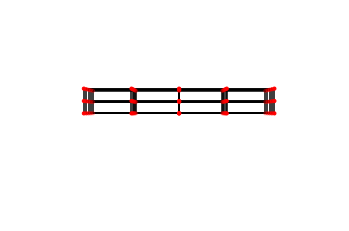

In [35]:
x0 = []
y0 = []
z0 = []
for i in M1_5x5.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

ax = Lattice_Plot(x0, y0, z0, M1_5x5, [], 'YZ', 25, 8, 0.1, 'M1_type_a_YZ')

In [66]:
forces_M1_AE_5x5 = np.load(path + '/Model 1/a/forces_M1_AE_5x5.npy')
forces_M1_5x5 = np.load(path + '/Model 1/a/forces_M1_5x5.npy')
z_centre_M1_5x5 = np.load(path + '/Model 1/a/z_centre_M1_5x5.npy')
z_centre_M1_AE_5x5 = np.load(path + '/Model 1/a/z_centre_M1_AE_5x5.npy')


In [76]:
#Equalizing the z for 2kN load
z_centre_M1_5x5 = -(-1*0.016312*100/z_centre_M1_5x5[4])*z_centre_M1_5x5
z_centre_M1_AE_5x5 = -(-1*0.016312*100/z_centre_M1_AE_5x5[4])*z_centre_M1_AE_5x5

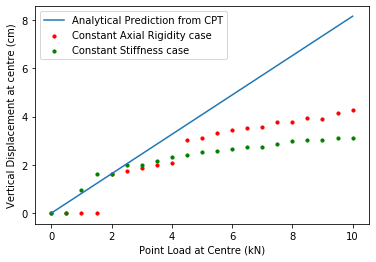

In [82]:
plt.scatter(forces_M1_AE_5x5, z_centre_M1_AE_5x5, c='r',s=10, label = "Constant Axial Rigidity case")
plt.scatter(forces_M1_5x5, z_centre_M1_5x5, c='g',s=10, label = "Constant Stiffness case")
plt.plot(forces_M1_5x5, 0.8156*forces_M1_5x5, label = "Analytical Prediction from CPT")
plt.xlabel('Point Load at Centre (kN)') 
plt.ylabel('Vertical Displacement at centre (cm)')
plt.legend()
#plt.title ('Model 1 - Type A - vertical Displacement with repspect to Point Load at centre')
plt.show()

In [64]:
z_centre_M1_AE_5x5

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.01677865,
       -0.01812159, -0.01932753, -0.02030055, -0.02136846, -0.03100755,
       -0.03190994, -0.03414459, -0.03542916, -0.03643166, -0.03680378,
       -0.03885362, -0.0386838 , -0.04044622, -0.04021317, -0.04265557,
       -0.04372622])

In [70]:
forces_M1_5x5

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [ ]:
np.load = np_load_old